In [34]:
import numpy as np
import pandas as pd
%matplotlib inline

In [41]:
df = pd.read_csv('nlp/nlp_out.csv')

In [42]:
df[['onedim_j', 'severity']][:5]

,onedim_j,severity
0,"{""Population Profile"": [""Demographic Profile""]}",Situation of Concern
1,null,Severe Conditions
2,null,Severe Conditions
3,null,Severe Conditions
4,null,Situation of Concern


In [19]:
severity_counts = df['severity'].value_counts()

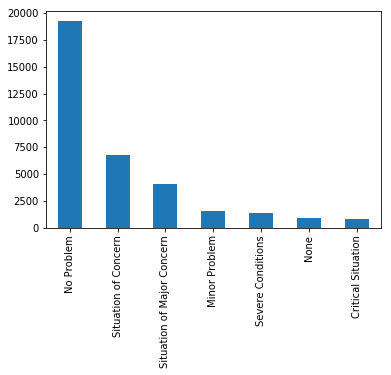

In [23]:
severity_counts.plot(kind='bar')

In [44]:
sev_conditions = df[df['severity'] == 'Severe Conditions']

In [47]:
sev_conditions[:1]

,onedim_j,twodim_j,reliability,severity,demo_groups_j,specific_needs_j,aff_groups_j,geo_j,info_date,excerpt,has_image,lead_text,lead_id,lead_url,event
1,null,"[{""sector"": ""Nutrition"", ""subsectors"": [""Breas...",Usually,Severe Conditions,"[""Infants/toddlers (< 5 years old)""]",null,"[""Affected""]",null,2016-11-15,"112,500 children under five are at risk of acu...",True,None,4,http://reliefweb.int/sites/reliefweb.int/files...,Test Event


In [30]:
df.filter(like='_j').columns

Index(['onedim_j', 'twodim_j', 'demo_groups_j', 'specific_needs_j',
       'aff_groups_j', 'geo_j'],
      dtype='object')

In [8]:
################ NLTK playing around
import nltk
from nltk.corpus import names

In [9]:
labeled_names = [(name, "male") for name in names.words('male.txt')] + [(name, "female") for name in names.words('female.txt')]

In [5]:
import random
def train_corpus(corpus, feature_function):
    """Returns a classifier and its accuracy based on the corpus and feature function"""
    # TODO: set option for uniform sampling of all groups or just sample randomly without considering 
    random.shuffle(corpus)
    feature_sets = [(feature_function(n), label) for (n, label) in corpus]
    train_set, test_set = feature_sets[500:], feature_sets[:500]
    classifier = nltk.NaiveBayesClassifier.train(train_set)
    accuracy = nltk.classify.accuracy(classifier, test_set)
    return classifier, accuracy

In [6]:
def gender_feature_1(name):
    return {'first': name[0], 'last':name[-1]}
def gender_feature_2(name):
    return {'last':name[-1]}

In [10]:
# Get classifiers
classifier1, accuracy1 = train_corpus(labeled_names, gender_feature_1)
classifier2, accuracy2 = train_corpus(labeled_names, gender_feature_2)
# Get features for carol
carol_f1 = gender_feature_1('carol')
carol_f2 = gender_feature_2('carol')

In [30]:
def get_classification_probs(classifier, features):
    """Returns list of tuples containing labelname and probability"""
    dist = classifier.prob_classify(features)
    return [(label, dist.prob(label)) for label in dist.samples()]

In [35]:
print(get_classification_probs(classifier2, carol_f2))
print(get_classification_probs(classifier1, carol_f1))

[('female', 0.47841239233277494), ('male', 0.5215876076672253)]
[('female', 0.36440393622717915), ('male', 0.635596063772822)]


In [12]:
import pickle
f= open('classifier.object', 'wb')
pickle.dump(classifier1, f)
f.close()

In [13]:
c =nltk.NaiveBayesClassifier()
c.classify('bibek')

TypeError: __init__() missing 2 required positional arguments: 'label_probdist' and 'feature_probdist'

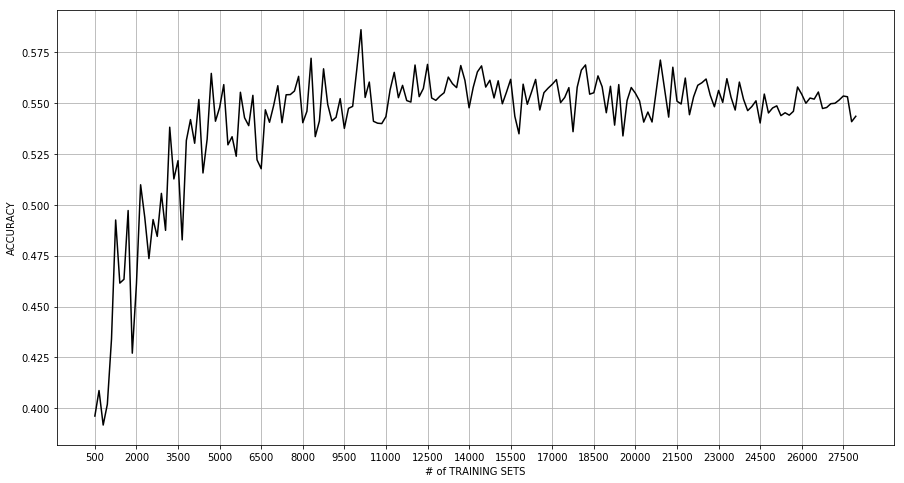

In [6]:
import matplotlib.pyplot as plt
import json
f = open('accuracy.json', 'r')
data = json.load(f)
x = list(map(lambda x: x[0], data))
y = list(map(lambda x: x[1], data))

fig = plt.figure(figsize=(15,8))
plt.xticks([x for x in range(500, 28000, 1500)])
plt.xlabel('# of TRAINING SETS')
plt.ylabel('ACCURACY')
plt.grid(True)
plt.plot(x, y, 'k')

In [1]:
import sys
sys.path.append('/home/bibek/projects/DEEPL')

In [2]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

In [15]:
X = np.random.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
clf = MultinomialNB()
clf.fit(X, y)
print(X[2:3])
print(clf.predict(X[2:4]))

[[4 2 3 3 0 1 0 4 2 1 2 2 3 0 2 4 0 2 2 0 4 0 1 2 1 4 3 1 0 2 2 2 3 3 0 3 2
  1 2 4 4 1 2 1 0 1 1 4 4 2 3 4 2 4 1 1 4 4 1 1 0 3 3 4 3 4 4 2 4 0 3 1 3 1
  3 0 0 2 4 4 2 1 1 1 3 0 0 1 0 4 1 3 2 1 4 2 2 3 0 1]]
[3 4]


In [16]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

twenty_train.target_names #prints all the categories

data = ["my name is bibek pandey.", "This is my first use of scikit learn.", "scikit learn is fun"]

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data)
X_train_counts.indices
#dir(X_train_counts)

array([ 8,  0,  3,  6,  5,  4,  9,  7, 11,  1, 10,  3,  5,  2,  4,  9,  3], dtype=int32)

In [37]:
import json
def to_processed_csv():
    csv_file_path = '/home/ubuntu/DEEPL/_playground/sample_data/nlp_out.csv'
    df = pd.read_csv(csv_file_path, header = 0)
    df
    # Convert json string columns to json
    df[df.filter(like="_j").columns] = df.filter(like="_j").applymap(
        lambda x : json.loads(x)
    )
    # Change column names
    for v in df.filter(like="_j"):
        df = df.rename(columns = {v : '_'.join(v.split('_')[:-1])})

    df = df[df['twodim'].notnull()][['twodim','excerpt']]
    df = df.assign(
        sector=df['twodim'].apply(lambda x: x[0]['sector']),
        subsector=df['twodim'].apply(lambda x: x[0]['subsectors'][0] if x[0]['subsectors'] else None)
    )
    df = df[["sector", "subsector", "excerpt"]]
    df.to_csv('sample_data/processed_sectors_subsectors.csv')
    print('done..')
    return df
df = to_processed_csv()


done..


In [5]:
from helpers.common import (
    rm_punc_not_nums, rm_punc_not_nums_list,
    rm_stop_words_txt, rm_stop_words_txt_list,
    remove_punc_and_nums,
    translate_to_english_txt,
    compose
)
from nltk.stem.porter import PorterStemmer
import random

from topic_modeling.keywords_extraction import get_key_ngrams

from helpers.functional import curried_map, curried_filter, curried_zip

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import SGDClassifier


df = pd.read_csv('sample_data/processed_sectors_subsectors.csv')

rm_stop_list = curried_map(rm_stop_words_txt)
rm_punc_list = curried_map(rm_punc_not_nums)
rm_punc_nums_list = curried_map(remove_punc_and_nums)
lower_list = curried_map(str.lower)

composed_list_processor= compose(remove_punc_and_nums, rm_stop_words_txt, ' '.join, str.split, str.lower)
punc_nums_preprocessor = compose(composed_list_processor, str)

stemmer = SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(CountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
    
# procecss the data
processed = df.assign(excerpt = df['excerpt'].apply(punc_nums_preprocessor))

In [6]:
### shuffle data and get test/train sets

processed = processed.sample(frac=1)
l = len(processed)
one_fourth = int(l/4)
train = processed['excerpt'][one_fourth:]
test = processed['excerpt'][:one_fourth]
target = processed['sector'][one_fourth:]
test_target = processed['sector'][:one_fourth]

In [7]:
### NAIVE BAYES
text_clf = Pipeline([
    ('vect', StemmedCountVectorizer(ngram_range=(1,2))), 
    ('tfidf', TfidfTransformer(use_idf=False)), 
    ('clf', MultinomialNB(alpha=0.01, fit_prior=False))
])

text_clf = text_clf.fit(train, target)

predicted = text_clf.predict(test)
np.mean(predicted == test_target)

0.7028668610301263

In [20]:
print(dir(text_clf))
d = "Hospitals being destroyed"
probs = text_clf.predict_proba([d])
classes = text_clf.classes_
list(zip(classes, probs[0]))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_estimator_type', '_final_estimator', '_fit', '_get_param_names', '_get_params', '_inverse_transform', '_pairwise', '_replace_estimator', '_set_params', '_transform', '_validate_names', '_validate_steps', 'classes_', 'decision_function', 'fit', 'fit_predict', 'fit_transform', 'get_params', 'inverse_transform', 'memory', 'named_steps', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params', 'steps', 'transform']


[('Agriculture', 0.0032521529988894012),
 ('Cross', 0.1624770439474284),
 ('Education', 0.032109892244252231),
 ('Food', 0.01820672043123105),
 ('Health', 0.34398549930969424),
 ('Livelihood', 0.010804719440560875),
 ('Logistic', 0.031000725551262605),
 ('NFI', 0.020517132188712393),
 ('Nutrition', 0.0060158477433009091),
 ('Protection', 0.057966300705590959),
 ('Shelter', 0.22084032774184514),
 ('WASH', 0.092823637697232883)]

In [14]:
## SVM
text_clf_svm = Pipeline([('vect', CountVectorizer(stop_words="english")), ('tfidf', TfidfTransformer(use_idf=False)),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-4, n_iter=15, random_state=43))])

text_clf_svm = text_clf_svm.fit(train, target)
predicted_svm = text_clf_svm.predict(test)
np.mean(predicted_svm == test_target)

/home/ubuntu/DEEPL/.env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.72376093294460642

In [8]:
# get accurate parameters
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}

# THIS MAKES MY COMPUTER HANG
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train, target)
print(gs_clf)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (0.01, 0.001)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [9]:
print(gs_clf.best_score_)
print(gs_clf.best_params_)


0.681457489879
{'vect__ngram_range': (1, 2), 'tfidf__use_idf': False, 'clf__alpha': 0.01}


In [ ]:
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}

gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(train, target)

print(gs_clf_svm.best_score_)
print(gs_clf_svm.best_params_)

In [1]:
import sys
sys.path.append('/home/bibek/projects/DEEPL')

In [6]:
from classifier.helpers import get_train_test_data

(train, target), (test, test_target) = get_train_test_data('/home/bibek/projects/DEEPL/_playground/sample_data/processed_sectors_subsectors.csv')

In [7]:
from classifier.NaiveBayesSKlearn import SKNaiveBayesClassifier
clf = SKNaiveBayesClassifier.new(train=train, target=target)

In [12]:
clf.classify_as_label_probs(["Health is wealth","children are the pillars of the nation"])
from django.conf import settings
#settings.configure()
from classifier.models import ClassifierModel

AppRegistryNotReady: Apps aren't loaded yet.